# Build & Evaluate Unsupervised Learning Models 
- Principal Component Analysis (PCA) is a statistical technique employed to reduce the dimensionality of data by transforming it into a new coordinate system where the axes correspond to the principal components. These principal components capture the maximum variance in the original dataset, facilitating data compression and enhancing visualization. 
- In this notebook, we implement PCA on the wine-clustering dataset from Kaggle, with the objective of condensing correlated variables into a subset that accounts for 80% of the variance in the complete dataset. Following this analysis, we apply k-means clustering to identify clusters while exploring different values for k (e.g., 3, 4, etc.). We also perform hierarchical clustering. Throughout the study, we examine various assumptions and interpret the results accordingly. 

In [2]:
__author__ = "Will Hinton"
__email__ = "willhint@gmail.com"
__website__ = "whinton0.github.com/py"

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


### Read in the dataset

In [4]:
# Load the wine dataset
wine = pd.read_csv('wine-clustering.csv')

### Perform preprocessing / standardization 
- Since PCA and clustering are not scale invariant, we must standardize the data

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine)

### Peform PCA 
- Apply PCA to retain enough components to explain at least 80% of variance 
- Calculate the cumulative explained variance 
- Determine how many components are needed for 80% variance
- Redo PCA with the determined number of components

In [6]:
# Apply PCA to retain enough components to explain at least 80% of variance
pca = PCA()
pca_components = pca.fit_transform(X_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine how many components are needed for 80% variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of components to retain 80% variance: {n_components_80}")

# Redo PCA with the determined number of components
pca_final = PCA(n_components=n_components_80)
X_pca = pca_final.fit_transform(X_scaled)

Number of components to retain 80% variance: 5


### Perform K-means clustering 
- Try different k values and plot inertia (elbow method) 
- Plot the Elbow curve 
- Based on the elbow plot, we select k (e.g., 3 clusters assumed) 
- Cluster labels 
- Plot the clustered data (only first two principal components for visualization) 

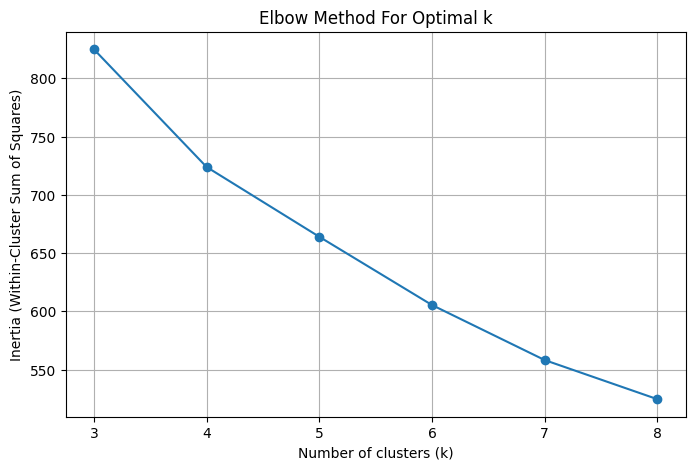

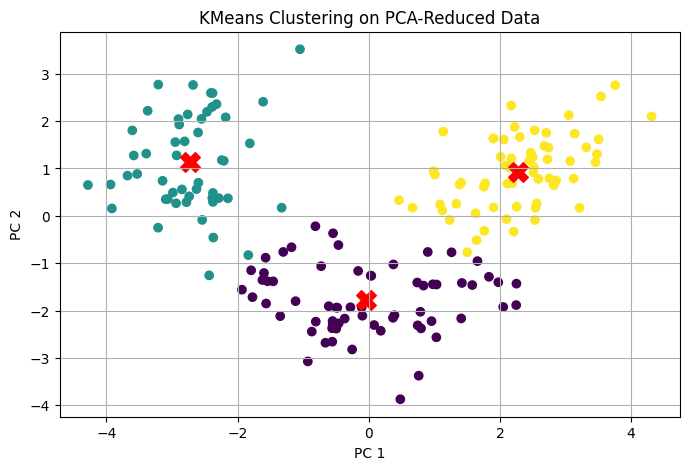

In [7]:
# Try different k values and plot inertia (elbow method)
inertia = []
k_range = range(3, 9)  # Test k from 3 to 8

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Based on the elbow plot, we select k (e.g., 3 clusters assumed for demonstration)
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans_final.fit(X_pca)

# Cluster labels
cluster_labels = kmeans_final.labels_

# Plot the clustered data (only first two principal components for visualization)
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('KMeans Clustering on PCA-Reduced Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()

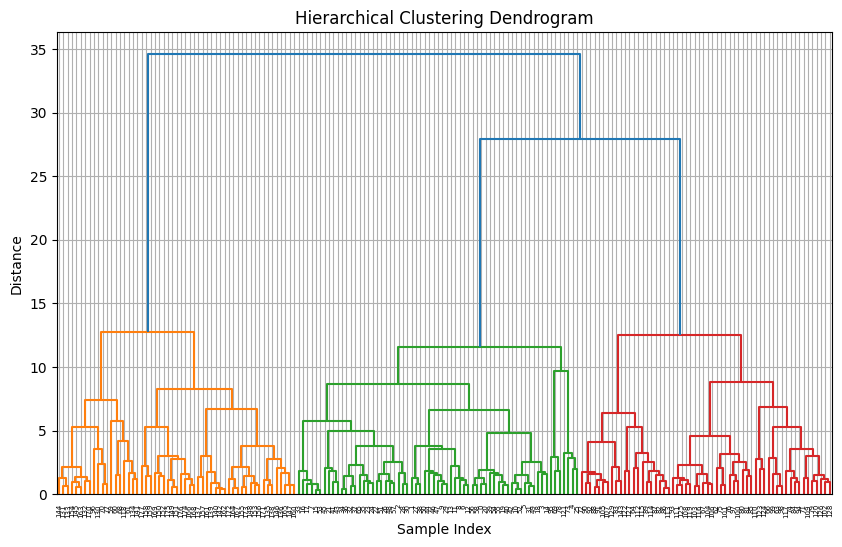

In [8]:
# -----------------------------------
# HIERARCHICAL CLUSTERING
# -----------------------------------
# Perform linkage for hierarchical clustering
linkage_matrix = linkage(X_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

### Side-by-side comparison of K-means vs hierarchical clustering 
- Perform KMeans clustering with optimal_k=3 
- Perform hierarchical clustering and cut into 3 clusters 
- Create side-by-side plots 
- Build KMeans clustering plot 
- Build Hierarchical clustering plot

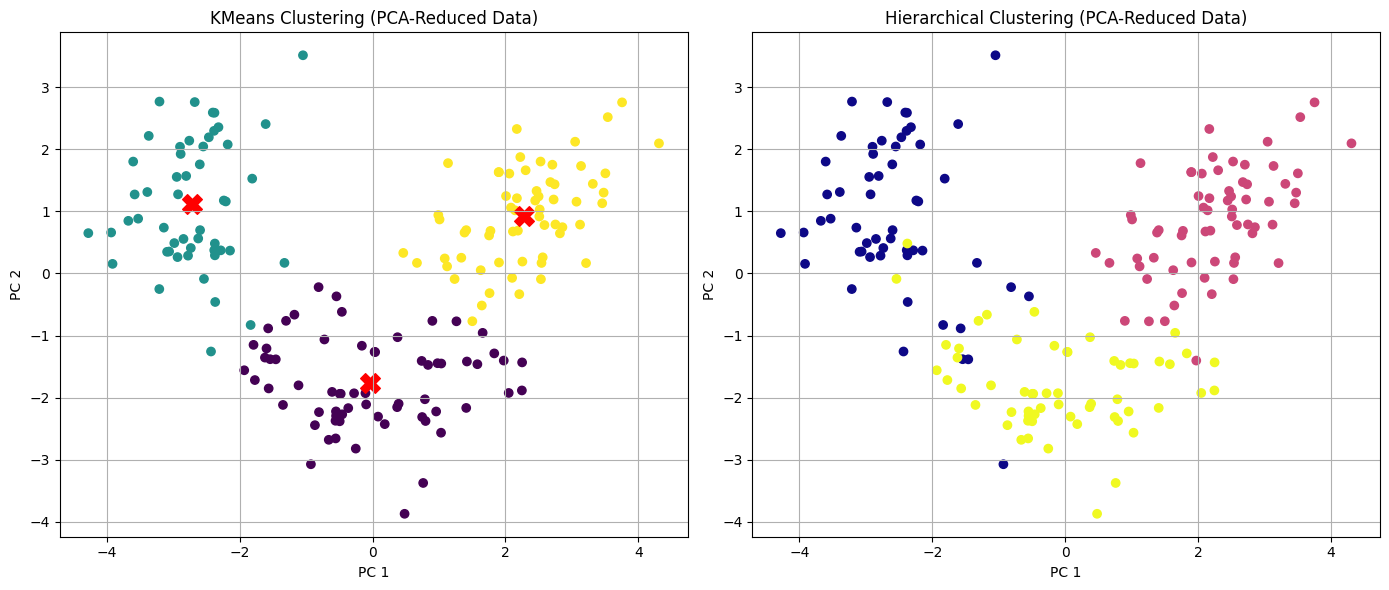

In [9]:
# Perform KMeans clustering with optimal_k=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Perform hierarchical clustering and cut into 3 clusters
linkage_matrix = linkage(X_pca, method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KMeans clustering plot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
axes[0].set_title('KMeans Clustering (PCA-Reduced Data)')
axes[0].set_xlabel('PC 1')
axes[0].set_ylabel('PC 2')
axes[0].grid(True)

# Hierarchical clustering plot
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='plasma', marker='o')
axes[1].set_title('Hierarchical Clustering (PCA-Reduced Data)')
axes[1].set_xlabel('PC 1')
axes[1].set_ylabel('PC 2')
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [10]:
## Summary of Findings

# 1. The dataset was standardized to ensure PCA and clustering methods were valid.
# 2. PCA was conducted and it was determined that retaining {n_components_80} principal components captured 80% of the total variance.
# 3. K-Means clustering was performed after PCA. An elbow plot suggested that an optimal k value around 3 may be appropriate.
#    Clustering based on PCA-reduced features improved interpretability and reduced noise.
# 4. Hierarchical clustering was performed, producing a dendrogram. Careful inspection of branch heights suggests several potential cluster separations.
# 5. Visualization compared KMeans and Hierarchical clustering results side-by-side, showing different grouping tendencies.
# 6. Final interpretation: PCA effectively reduced dimensionality while preserving most variance. Clustering techniques revealed meaningful underlying structures.
# 7. Important assumptions like scaling were properly addressed, ensuring reliable results.
